## Step 1: Data Preprocessing

#### Name: Tian Lan

### Problem Summary

### Data Dictionary

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
suggvids = pd.read_csv('Tiktok_dataset/sug_users_vids_all.csv')
suggvids1 = pd.read_csv('Tiktok_dataset/sug_users_vids1.csv')
suggvids2 = pd.read_csv('Tiktok_dataset/sug_users_vids2.csv')
suggvids3 = pd.read_csv('Tiktok_dataset/sug_users_vids3.csv')
suggvids4 = pd.read_csv('Tiktok_dataset/sug_users_vids4.csv')
suggvids5 = pd.read_csv('Tiktok_dataset/top_users_vids.csv')

In [90]:
print(suggvids.shape)
print(suggvids1.shape)
print(suggvids2.shape)
print(suggvids3.shape)
print(suggvids4.shape)
print(suggvids5.shape)

(41702, 13)
(11921, 13)
(11903, 13)
(12677, 13)
(5201, 13)
(12559, 13)


In [91]:
data_df = pd.concat([suggvids, suggvids1, suggvids2, suggvids3, suggvids4, suggvids5])

In [92]:
data_df.sample(10)

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
982,6843438819631451394,1593362270,awezdarbar,"['appreciationpost', 'Atrangz']",original sound,15,222600,243,715,1700000,26000000,1100000000,2713
10118,6838143340999937282,1592129318,arshfam,['guessthepunjabisayings'],original sound,14,9557,8,32,111100,2200000,58900000,2453
12164,6890696100794125574,1604365239,ilovefriday,[],original sound,10,28700,17,249,138900,2300000,69100000,866
1365,6891748623952956677,1604610308,sports.illustrated,"['inspirational', 'inspiration', 'nba', 'hoops']",original sound,8,2189,5,25,12000,740600,13700000,653
13921,6885732968409615622,1603209668,gaitlyn.rae,"['reddiwip', 'gaitlynrae', 'gaitlyn', 'fyp', '...",original sound,59,3000000,360700,37900,24700000,7100000,81100000,192
2384,6873598384335260934,1600384346,thehypehouse,[],Midnight Sky,15,590100,456,2677,2800000,19300000,540600000,321
4900,6797337990675893505,1582628582,jacquelinef_143,['zoommyface'],Bagaikan Langit（cover）,10,1100000,4064,4816,15600000,13600000,84800000,61
2840,6882832319535664390,1602534319,leahashe,"['fyp', 'foryou']",Operate,18,181600,863,8917,796100,2900000,34500000,81
3255,6852051876553182470,1595367651,rizxtaaarr,[],sonido original,8,56,3,3,422,6896,51900,678
641,6882838509841943813,1602535763,lizzza,[],original sound,32,1400000,13200,11500,5800000,24700000,277800000,133


In [93]:
print(f'The Tiktok dataset has {data_df.shape[0]} rows and {data_df.shape[1]} columns.')

The Tiktok dataset has 95963 rows and 13 columns.


In [94]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95963 entries, 0 to 12558
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             95963 non-null  int64 
 1   create_time    95963 non-null  int64 
 2   user_name      95963 non-null  object
 3   hashtags       95963 non-null  object
 4   song           95892 non-null  object
 5   video_length   95963 non-null  int64 
 6   n_likes        95963 non-null  int64 
 7   n_shares       95963 non-null  int64 
 8   n_comments     95963 non-null  int64 
 9   n_plays        95963 non-null  int64 
 10  n_followers    95963 non-null  int64 
 11  n_total_likes  95963 non-null  int64 
 12  n_total_vids   95963 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 10.2+ MB


#### Check duplicated rows

In [95]:
data_df.duplicated().sum()

43119

In [96]:
(data_df.duplicated().sum() / data_df.shape[0]) * 100

44.932942905078

Based on an analysis of the dataset, it was observed that approximately 45% of the total records consisted of duplicated rows. This considerable percentage necessitates a meticulous estimation of the duplicated rows prior to their removal.

In [97]:
duplicates = data_df[data_df.duplicated(keep=False)].copy()

duplicates

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,6892428462015958273,1604768557,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,1604619960,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,1604497592,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211
3,6891050048403049730,1604447622,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,211
4,6890886086613126402,1604409445,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,6767921821300821254,1575779598,camilacabello,[],My Oh My,15,7000000,150500,45300,67700000,9100000,45500000,17
12058,237064298542501888,1496863248,camilacabello,['knownobetter'],Know No Better (feat. Quavo),18,882400,5540,6230,8600000,9100000,45500000,17
12131,6888785570168917254,1603920492,wewearcute,[],Slow Motion (feat. JoJo),15,197200,136,1249,1100000,10300000,528100000,1453
12273,6882780829563604229,1602522343,mariahandbill,"['NEW', 'bangenergy', 'fyp']",original sound,43,233100,180,1036,1300000,9800000,324900000,668


The verification of duplicated records can be effectively performed by employing a unique identifier (i.e. id) assigned to each entry. To accomplish this, a sampling technique can be used wherein a random selection of ID numbers is made. By examining the duplicated content associated with these selected IDs, a determination can be made regarding the authenticity of the duplication. This systematic approach ensures a comprehensive evaluation of the duplicated records before proceeding with any necessary actions, such as removal or consolidation.

In [98]:
sampled_duplicates = duplicates.sample(n=3, random_state=456)

sampled_duplicates

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
1235,6885557149536210181,1603168774,nfl,"['nickfoles', 'nfl', 'football', 'motivation',...",A Moment Apart - ODESZA,30,87200,1123,895,604300,5100000,147000000,523
27341,6793135596832345350,1581650136,eddy_skabeche,[],sonido original,8,637600,920,2128,5800000,2400000,11300000,30
6656,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743


In [99]:
duplicates[duplicates['id']==6885557149536210181]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
25059,6885557149536210181,1603168774,nfl,"['nickfoles', 'nfl', 'football', 'motivation',...",A Moment Apart - ODESZA,30,87200,1123,895,604300,5100000,147000000,523
1235,6885557149536210181,1603168774,nfl,"['nickfoles', 'nfl', 'football', 'motivation',...",A Moment Apart - ODESZA,30,87200,1123,895,604300,5100000,147000000,523


In [100]:
duplicates[duplicates['id']==6793135596832345350]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
27341,6793135596832345350,1581650136,eddy_skabeche,[],sonido original,8,637600,920,2128,5800000,2400000,11300000,30
3517,6793135596832345350,1581650136,eddy_skabeche,[],sonido original,8,637600,920,2128,5800000,2400000,11300000,30


In [101]:
duplicates[duplicates['id']==6884349740050435333]

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
6656,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743
6656,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743
6659,6884349740050435333,1602887619,eliottbrown,[],original sound,13,199200,168,443,1100000,12900000,458600000,743


Upon careful observation, it appears that the duplications are indeed genuine and likely stem from duplicated records originating from different data sources. It is essential to address these duplicated rows as they can  impact the accuracy and reliability of subsequent popularity analysis. Consequently, it is advisable to proceed with the removal of these duplications to ensure the integrity of the data and enhance the validity of the popularity analysis.

In [102]:
clean_df = data_df.copy()

clean_df.drop_duplicates(keep = 'first', inplace = True)

print(f'The Tiktok dataset has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns after dropping duplicated rows.')

The Tiktok dataset has 52844 rows and 13 columns after dropping duplicated rows.


#### Check missing value

In [103]:
clean_df.isna().sum(axis=0)

id                0
create_time       0
user_name         0
hashtags          0
song             42
video_length      0
n_likes           0
n_shares          0
n_comments        0
n_plays           0
n_followers       0
n_total_likes     0
n_total_vids      0
dtype: int64

In [104]:
clean_df[clean_df['song'].isna()].sample(10)

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
6114,6819254344953761025,1587731381,shirleysetia,"['duetwithshirleysetia', 'tiktokindia', 'shirl...",NaN,10,145100,1463,655,1300000,4500000,28600000,114
8108,6829896491218324738,1590209199,gauravarora_5,"['foryou', 'trending']",NaN,16,510700,1022,892,6200000,10800000,140900000,1817
6775,6837111990247247105,1591889189,wish_rathod,"['tiktok_india', 'foryou', 'fyp', 'bloopervide...",NaN,14,974500,3233,2210,12600000,12200000,270900000,799
25821,6839513857321356546,1592448418,sibbugiri97,[],NaN,8,4549,142,43,59900,2200000,28900000,669
16177,6834598031778663685,1591303861,maverickandcashbaker,[],NaN,8,283,0,0,1970,22400,52000,157
8111,6828776583508151554,1589948450,gauravarora_5,"['foryou', 'trending']",NaN,12,30000,46,58,260700,10800000,140900000,1817
2891,6812367025785081094,1586127802,camerondallas,['smh'],NaN,10,1800000,25000,15200,11600000,17900000,311600000,84
23569,6806042795225238790,1584655327,tiktokmama555,[],NaN,15,527700,993,3506,3400000,2100000,13200000,11
32528,6838226814926687489,1592148754,ashnazaveri,"['Retrogaana', 'greentea', 'lovers']",NaN,9,5699,35,55,322400,427100,1600000,109
12592,6829560209237609730,1590130902,guruchoudhary53,"['love', 'song', 'gurmeetchoudhary', 'tiktokin...",NaN,12,60700,485,386,878000,2300000,19700000,141


Within the dataset, a total of 42 rows have been identified where the `song` column contains NaN values. In the given context, this occurrence can be reasonably explained as users choosing not to utilize any background music for their videos. To address these missing values, the approach will involve replacing the NaN entries with the value **original sound** to accurately reflect the absence of a selected song for those particular instances.

In [105]:
clean_df['song'].fillna('original sound', inplace=True)

In [106]:
clean_df.isna().sum(axis=0)

id               0
create_time      0
user_name        0
hashtags         0
song             0
video_length     0
n_likes          0
n_shares         0
n_comments       0
n_plays          0
n_followers      0
n_total_likes    0
n_total_vids     0
dtype: int64

#### Check data type

In [108]:
clean_df.dtypes

id                int64
create_time       int64
user_name        object
hashtags         object
song             object
video_length      int64
n_likes           int64
n_shares          int64
n_comments        int64
n_plays           int64
n_followers       int64
n_total_likes     int64
n_total_vids      int64
dtype: object

Within the dataset, there are certain columns whose data types are not appropriate for the intended analysis. I'll apply the following adjustments:

- `create_time`: The `create_time` column should be converted to the datetime type. Once converted, additional features can be derived from this column, such as extracting the year, month, day, weekday, and distinguishing between morning, afternoon, and evening timestamps.

- `hashtags`: The `hashtags` column consists of a list of hashtags associated with each entry. To appropriately represent these hashtags in a machine learning model, a one-hot encoding technique can be applied. Each unique hashtag can be encoded using binary values of 0 and 1, indicating the absence or presence of the respective hashtag in a given entry. (I'll do it later.)

*`create_time` column*

In [109]:
clean_df['create_time'] = pd.to_datetime(clean_df['create_time'], unit='s')

clean_df['create_time']

0       2020-11-07 17:02:37
1       2020-11-05 23:46:00
2       2020-11-04 13:46:32
3       2020-11-03 23:53:42
4       2020-11-03 13:17:25
                ...        
12554   2020-09-26 16:12:13
12555   2020-09-25 16:41:32
12556   2020-09-25 16:05:06
12557   2020-09-24 18:06:55
12558   2020-09-24 17:08:57
Name: create_time, Length: 52844, dtype: datetime64[ns]

In [110]:
# extracting the year, month, day, weekday

clean_df['year'] = clean_df['create_time'].dt.year
clean_df['month'] = clean_df['create_time'].dt.month
clean_df['day'] = clean_df['create_time'].dt.day
clean_df['weekday'] = clean_df['create_time'].dt.weekday + 1

# range the weekday from 1 to 7, corresponding to Mon to Sun

In [111]:
# distinguishing between morning, afternoon, evening and midnight

clean_df['timestamp_period'] = ''

clean_df.loc[clean_df['create_time'].dt.hour < 6, 'timestamp_period'] = 'Midnight'
clean_df.loc[(clean_df['create_time'].dt.hour >= 6) & (clean_df['create_time'].dt.hour < 12), 'timestamp_period'] = 'Morning'
clean_df.loc[(clean_df['create_time'].dt.hour >= 12) & (clean_df['create_time'].dt.hour < 18), 'timestamp_period'] = 'Afternoon'
clean_df.loc[(clean_df['create_time'].dt.hour >= 18) & (clean_df['create_time'].dt.hour < 24), 'timestamp_period'] = 'Evening'

In [112]:
clean_df.sample(10)

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids,year,month,day,weekday,timestamp_period
34839,6841719887694449922,2020-06-24 01:27:31,vikubalupura,"['wow', 'foryoupage', 'fürdich']",Then Leave,15,24600,380,104,286200,3900000,56100000,432,2020,6,24,3,Midnight
2291,6875496305154739462,2020-09-23 01:57:41,jasoncoffee,[],Solve Rubiks Cube Fast,44,462000,246,928,1800000,20600000,1100000000,3269,2020,9,23,3,Midnight
39669,6843283305526365442,2020-06-28 06:34:19,dildar__tanbir,[],original sound,34,2674,5,32,33100,2200000,20300000,365,2020,6,28,7,Morning
34214,6871158258388749574,2020-09-11 09:26:24,devbaebae,[],THICK,15,19800,491,242,108900,60400,562800,58,2020,9,11,5,Morning
11154,6878284002587856130,2020-09-30 14:14:53,sebastianyatra,[],Se Te Nota,15,1200000,3539,6450,7700000,11600000,76600000,145,2020,9,30,3,Afternoon
19039,6880295205866720517,2020-10-06 00:19:56,squirrel_baitbackup,"['tiktok', 'fyp', 'foryou', 'foryoupage']",Come and Get Your Love,6,11600,71,148,165100,2200000,41200000,283,2020,10,6,2,Midnight
21111,6886178741924416770,2020-10-21 20:50:32,elitekravmagapanama,"['idpapanama', 'idpa']",original sound,17,390,4,1,11800,91300,270800,108,2020,10,21,3,Evening
1581,6890225170099801345,2020-11-01 18:32:44,jaydencroes,[],Devil in disguise but its HARD,15,423400,767,2008,2400000,23200000,1000000000,2780,2020,11,1,7,Evening
14526,6892087471593639174,2020-11-06 19:00:10,worldstar,"['FallFashion', 'relatable', 'schoollife']",original sound,15,14300,309,171,87500,7600000,242200000,4060,2020,11,6,5,Evening
18847,6838230794486500613,2020-06-14 15:48:00,afsha.shah,"['tummiledilkhile', 'foryou', 'trending', 'afs...",Tum Mile Cover,15,8510,117,82,109800,2900000,37000000,860,2020,6,14,7,Afternoon


In [113]:
clean_df = clean_df.drop('create_time', axis=1)

#### Change feature names for better understanding

In [114]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52844 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                52844 non-null  int64 
 1   user_name         52844 non-null  object
 2   hashtags          52844 non-null  object
 3   song              52844 non-null  object
 4   video_length      52844 non-null  int64 
 5   n_likes           52844 non-null  int64 
 6   n_shares          52844 non-null  int64 
 7   n_comments        52844 non-null  int64 
 8   n_plays           52844 non-null  int64 
 9   n_followers       52844 non-null  int64 
 10  n_total_likes     52844 non-null  int64 
 11  n_total_vids      52844 non-null  int64 
 12  year              52844 non-null  int32 
 13  month             52844 non-null  int32 
 14  day               52844 non-null  int32 
 15  weekday           52844 non-null  int32 
 16  timestamp_period  52844 non-null  object
dtypes: int32(4), int6

In [115]:
clean_df.rename(columns={'id': 'Video ID',
                    'create_time': 'Upload Time',
                    'user_name': 'User',
                    'hashtags': 'Hashtags',
                    'song': 'Song Title',
                    'video_length': 'Video Length',
                    'n_likes': 'Likes',
                    'n_shares': 'Shares',
                    'n_comments': 'Comments',
                    'n_plays': 'Views',
                    'n_followers': 'Followers',
                    'n_total_likes': 'Total Likes',
                    'n_total_vids': 'Total Videos',
                    'year': 'Upload Year',
                    'month': 'Upload Month',
                    'day': 'Upload Day',
                    'weekday': 'Upload Weekday',
                    'timestamp_period': 'Upload Period'}, 
                inplace = True)

In [116]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52844 entries, 0 to 12558
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Video ID        52844 non-null  int64 
 1   User            52844 non-null  object
 2   Hashtags        52844 non-null  object
 3   Song Title      52844 non-null  object
 4   Video Length    52844 non-null  int64 
 5   Likes           52844 non-null  int64 
 6   Shares          52844 non-null  int64 
 7   Comments        52844 non-null  int64 
 8   Views           52844 non-null  int64 
 9   Followers       52844 non-null  int64 
 10  Total Likes     52844 non-null  int64 
 11  Total Videos    52844 non-null  int64 
 12  Upload Year     52844 non-null  int32 
 13  Upload Month    52844 non-null  int32 
 14  Upload Day      52844 non-null  int32 
 15  Upload Weekday  52844 non-null  int32 
 16  Upload Period   52844 non-null  object
dtypes: int32(4), int64(9), object(4)
memory usage: 6.5+ MB


#### Feature Engineering

Two new features, namely `Total Engagement`, `Engagement Rate` and `Number of Hashtags`, can be created based on the existing dataset.

`Total Engagement`: This feature represents the overall level of engagement generated by each video. It is computed by summing up relevant engagement metrics (i.e. likes, comments, and shares). By aggregating these metrics, the "Total Engagement" feature provides a comprehensive measure of the audience's interaction and involvement with a particular video.

`Engagement Rate`: The `Engagement Rate` feature quantifies the level of engagement relative to the size of the audience reached. The industry standard in social media typically calculated it as the ratio of the total engagement (as computed above) to the number of followers. This metric helps to gauge the effectiveness of a video in capturing the attention and interest of the audience on a per-follower basis.

`Number of Hashtags`: The `Number of Hashtags` feature represents lower-level data, it adds valuable insights to the dataset by allowing for a more granular analysis, correlation assessment, segmentation, and optimization strategies related to hashtag usage in TikTok videos.

`Total Engagement` feature

In [117]:
clean_df['Total Engagement'] = clean_df['Likes'] + clean_df['Shares'] + clean_df['Comments']

In [118]:
clean_df['Total Engagement'].describe()

count    5.284400e+04
mean     3.575558e+05
std      9.066833e+05
min      0.000000e+00
25%      1.172650e+04
50%      8.375700e+04
75%      3.179910e+05
max      2.296920e+07
Name: Total Engagement, dtype: float64

In [119]:
clean_df['Followers'].describe()

count    5.284400e+04
mean     6.901132e+06
std      8.812773e+06
min      0.000000e+00
25%      8.573000e+05
50%      3.500000e+06
75%      1.060000e+07
max      9.740000e+07
Name: Followers, dtype: float64

`Engagement Rate` feature

In [120]:
# Followers column contains 0 - set the Engagement Rate to 0

clean_df['Engagement Rate'] = np.where(clean_df['Followers'] == 0, 0, \
                                       (clean_df['Total Engagement'] / clean_df['Followers']))

In [121]:
clean_df['Engagement Rate'].describe()

count    52844.000000
mean         0.067889
std          0.202538
min          0.000000
25%          0.009068
50%          0.023812
75%          0.060788
max         14.970815
Name: Engagement Rate, dtype: float64

Based on the observed data, it is evident that the average engagement rate is approximately 6.8%. However, a notable disparity arises when considering the 75th percentile, which stands at around 6%, while the maximum engagement rate approaches 15%. This substantial difference strongly suggests the presence of outliers within the dataset, potentially attributable to influential individuals who exhibit exceptional user loyalty and foster high levels of interaction.

This phenomenon is further supported by the visual representation provided by the boxplot, which clearly illustrates the presence of these outliers.

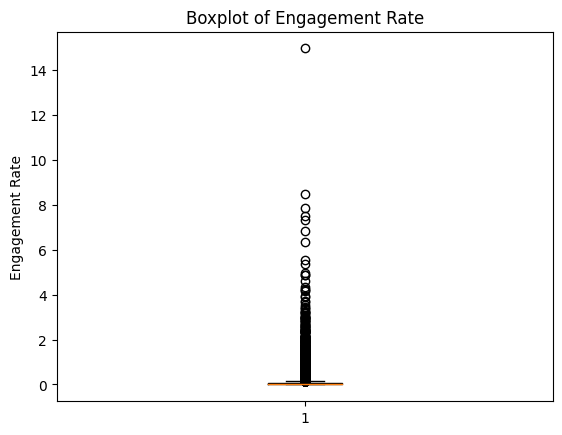

In [122]:
plt.boxplot(clean_df['Engagement Rate'])
plt.title('Boxplot of Engagement Rate')
plt.ylabel('Engagement Rate')
plt.show()

In [123]:
clean_df.loc[clean_df['Engagement Rate'].idxmax()]

Video ID                  6848684775780158726
User                    payton.moormeier.faan
Hashtags                  ['paytonmoormeier']
Song Title          Obnimi - Callmearco Remix
Video Length                               10
Likes                                   26600
Shares                                    396
Comments                                  191
Views                                  123700
Followers                                1816
Total Likes                             69600
Total Videos                               77
Upload Year                              2020
Upload Month                                7
Upload Day                                 12
Upload Weekday                              7
Upload Period                         Evening
Total Engagement                        27187
Engagement Rate                     14.970815
Name: 22988, dtype: object

In [125]:
clean_df[clean_df['Video ID']==6848684775780158726]

,Video ID,User,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate
22988,6848684775780158726,payton.moormeier.faan,['paytonmoormeier'],Obnimi - Callmearco Remix,10,26600,396,191,123700,1816,69600,77,2020,7,12,7,Evening,27187,14.970815


Upon examining the row with the highest Engagement Rate, it appears that the corresponding user has only posted a single video within the collected timeframe. Notably, this particular video has garnered a significant number of views and likes, despite the user having a relatively small number of followers (less than 2,000).

Further investigation reveals that the user in question operates a fan page dedicated to Payton Moormeier, a well-known social media personality recognized for his comedy, dance, and lip-sync videos on platforms like TikTok. It is worth mentioning that during the video's upload period in July 2020, Payton Moormeier had recently released his first music and experienced a surge in popularity.

I'll keep the outliers for now.

`Number of Hashtags` feature

In [126]:
def amount_of_hashtags(hashtag_list):
    amount = []
    for i in hashtag_list:
        if i.replace("'", "").strip('][').split(', ') == ['']:
            amount.append(0)
        else:
            amount.append(len(i.replace("'", "").strip('][').split(', ')))
    return amount

In [127]:
clean_df['Number of Hashtags'] = amount_of_hashtags(clean_df['Hashtags'])

clean_df.sample(5)

,Video ID,User,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate,Number of Hashtags
22942,6887598589338488069,disneypaypay,[],original sound,9,142,0,17,337,1941,67500,192,2020,10,25,7,Afternoon,159,0.081917,0
13519,6892144474626051333,brycehall,[],Adderall (Corvette Corvette),15,371300,1077,6263,1600000,15200000,935200000,1078,2020,11,6,5,Evening,378640,0.024911,0
8861,6881380809396276481,elo_os,"['parati', 'fyp', 'fy']",original sound,4,128200,59,0,759500,1800000,32100000,183,2020,10,8,4,Evening,128259,0.071255,3
18233,6873527830983068934,capronfunky,"['fyp', 'wife']",DDG AND WOOWOP,8,160000,4240,380,1500000,1500000,30100000,367,2020,9,17,4,Evening,164620,0.109747,2
20393,6862493373312322822,cyrusdobre,[],Dream Girl,10,491100,2240,6732,5500000,7000000,69100000,175,2020,8,19,3,Midnight,500072,0.071439,0


In [128]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52844 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            52844 non-null  int64  
 1   User                52844 non-null  object 
 2   Hashtags            52844 non-null  object 
 3   Song Title          52844 non-null  object 
 4   Video Length        52844 non-null  int64  
 5   Likes               52844 non-null  int64  
 6   Shares              52844 non-null  int64  
 7   Comments            52844 non-null  int64  
 8   Views               52844 non-null  int64  
 9   Followers           52844 non-null  int64  
 10  Total Likes         52844 non-null  int64  
 11  Total Videos        52844 non-null  int64  
 12  Upload Year         52844 non-null  int32  
 13  Upload Month        52844 non-null  int32  
 14  Upload Day          52844 non-null  int32  
 15  Upload Weekday      52844 non-null  int32  
 16  Upload Pe

#### Eliminate Redundant Columns

In [129]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52844 entries, 0 to 12558
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            52844 non-null  int64  
 1   User                52844 non-null  object 
 2   Hashtags            52844 non-null  object 
 3   Song Title          52844 non-null  object 
 4   Video Length        52844 non-null  int64  
 5   Likes               52844 non-null  int64  
 6   Shares              52844 non-null  int64  
 7   Comments            52844 non-null  int64  
 8   Views               52844 non-null  int64  
 9   Followers           52844 non-null  int64  
 10  Total Likes         52844 non-null  int64  
 11  Total Videos        52844 non-null  int64  
 12  Upload Year         52844 non-null  int32  
 13  Upload Month        52844 non-null  int32  
 14  Upload Day          52844 non-null  int32  
 15  Upload Weekday      52844 non-null  int32  
 16  Upload Pe

Upon closer examination of the dataset, it appears that there may be redundancy between the columns 'User_ID' and 'User'. If these columns represent identical information, I will remove the 'user' column from the dataset. 

In [130]:
clean_df.shape

(52844, 20)

#### Save clean dataset

In [131]:
clean_df.to_csv('clean_data.csv', index=False)